In [2]:
%matplotlib inline

from collections import defaultdict
import cPickle as pickle
import os
import glob

from matplotlib import pyplot
import pandas as pd
import pybedtools
import seaborn as sns

In [3]:
fox2_iclip = pickle.load(open("/home/gpratt/projects/fox2_iclip/analysis/v5/FOX2_lowRNAse_noL.merged.peaks.bed.clip_analysis.pickle"))
fox2_293t_1120 = pickle.load(open("/projects/ps-yeolab2/encode/analysis/encode_v12/293XT_CLIP_RBFOX2_1120_RBFOX2.merged.r2.peaks.bed.clip_analysis.pickle"))
fox2_293t_0204 = pickle.load(open("/projects/ps-yeolab2/encode/analysis/encode_v12/293XT_CLIP_RBFOX2_0204_RBFOX2.merged.r2.peaks.bed.clip_analysis.pickle"))

In [6]:
foo = fox2_iclip['region_sizes']

In [9]:
all_count = foo['all']

In [14]:
all_count

3121351

In [10]:
del foo['all']

In [13]:
sum(foo.values())

3174894

In [ ]:
3121351 
3174894 

In [1]:
dir_name = "/projects/ps-yeolab2/encode/analysis/encode_v12"

In [4]:
peaks_to_annotate = {"RBFOX2_293XT_1to200_gel_RBFOX2": os.path.join(dir_name, "RBFOX2_293XT_1to200_gel_RBFOX2.merged.r2.peaks.bed.clip_analysis.pickle"),
                     "RBFOX2_293XT_1to100_gel_RBFOX2": os.path.join(dir_name, "RBFOX2_293XT_1to100_gel_RBFOX2.merged.r2.peaks.bed.clip_analysis.pickle"),
                     "RBFOX2_293XT_1to50_gel_RBFOX2": os.path.join(dir_name, "RBFOX2_293XT_1to50_gel_RBFOX2.merged.r2.peaks.bed.clip_analysis.pickle"),
                     "RBFOX2_293XT_1to25_gel_RBFOX2": os.path.join(dir_name, "RBFOX2_293XT_1to25_gel_RBFOX2.merged.r2.peaks.bed.clip_analysis.pickle"),
                     "RBFOX2_293XT_1to12_gel_RBFOX2": os.path.join(dir_name, "RBFOX2_293XT_1to12_gel_RBFOX2.merged.r2.peaks.bed.clip_analysis.pickle"),
                     "EVN_041315_CLIP10_RBFOX2": os.path.join(dir_name, "EVN_041315_CLIP10_RBFOX2.merged.r2.peaks.bed.clip_analysis.pickle"),
                     "EVN_041315_CLIP8_RBFOX2": os.path.join(dir_name, "EVN_041315_CLIP8_RBFOX2.merged.r2.peaks.bed.clip_analysis.pickle"),
                     "EVN_041315_CLIP1_RBFOX2": os.path.join(dir_name, "EVN_041315_CLIP1_RBFOX2.merged.r2.peaks.bed.clip_analysis.pickle"),
                     "EVN_041315_CLIP5_RBFOX2": os.path.join(dir_name, "EVN_041315_CLIP5_RBFOX2.merged.r2.peaks.bed.clip_analysis.pickle"),
                     "EVN_041315_CLIP6_RBFOX2": os.path.join(dir_name, "EVN_041315_CLIP6_RBFOX2.merged.r2.peaks.bed.clip_analysis.pickle"),}


In [15]:
result = {}
for name in peaks_to_annotate:
    item = pickle.load(open(peaks_to_annotate[name]))
    result[name] = item['region_sizes']

EVN_041315_CLIP10_RBFOX2
EVN_041315_CLIP6_RBFOX2
EVN_041315_CLIP8_RBFOX2
RBFOX2_293XT_1to200_gel_RBFOX2
RBFOX2_293XT_1to100_gel_RBFOX2
EVN_041315_CLIP1_RBFOX2
RBFOX2_293XT_1to12_gel_RBFOX2
RBFOX2_293XT_1to50_gel_RBFOX2
EVN_041315_CLIP5_RBFOX2
RBFOX2_293XT_1to25_gel_RBFOX2


In [13]:
pd.DataFrame(result).to_csv("/home/gpratt/Dropbox/encode_integration/for_eric/shearing_peak_coverage_v12.csv")

In [39]:
plotting_data = {}
for name in peaks_to_annotate:
    item = pickle.load(open(peaks_to_annotate[name]))
    plotting_data[name] = item['data']

In [46]:
plotting_data.keys()

['EVN_041315_CLIP10_RBFOX2',
 'EVN_041315_CLIP8_RBFOX2',
 'RBFOX2_293XT_1to100_gel_RBFOX2',
 'EVN_041315_CLIP1_RBFOX2',
 'RBFOX2_293XT_1to50_gel_RBFOX2',
 'EVN_041315_CLIP6_RBFOX2',
 'RBFOX2_293XT_1to200_gel_RBFOX2',
 'RBFOX2_293XT_1to12_gel_RBFOX2',
 'EVN_041315_CLIP5_RBFOX2',
 'RBFOX2_293XT_1to25_gel_RBFOX2']

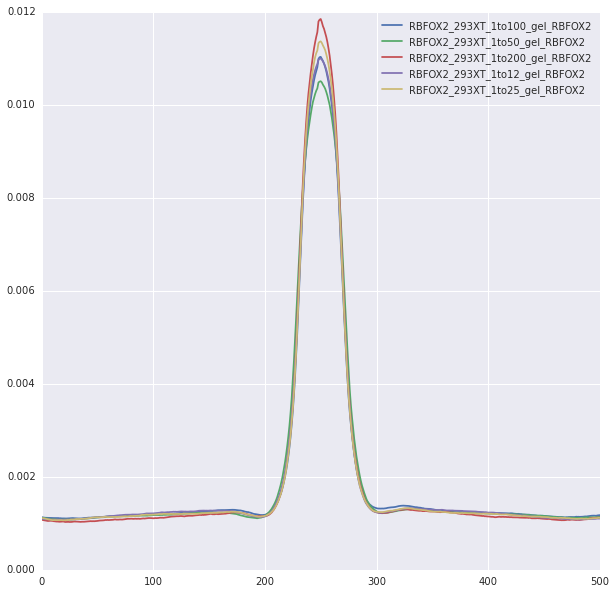

In [50]:
fig = pyplot.figure(figsize=(10,10))

ax = fig.add_subplot(1,1,1)
for name in plotting_data:
    if "RBFOX2_" in name:
        data = item['data']
        ax.plot(plotting_data[name].mean(axis=0), label=name)
ax.legend(loc=0)

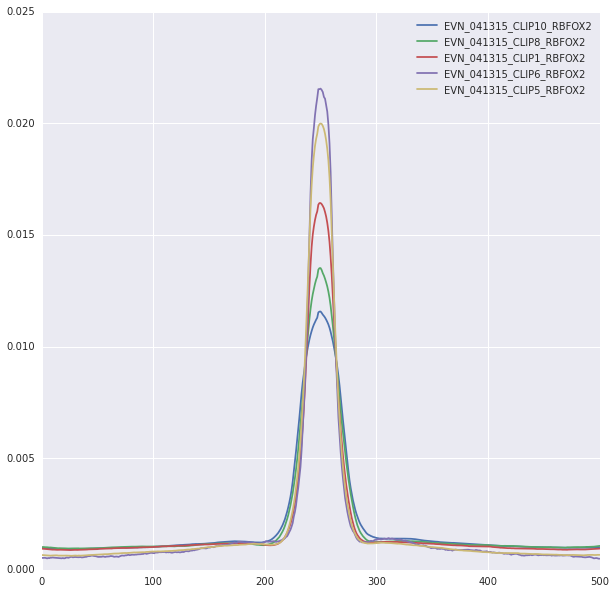

In [51]:
fig = pyplot.figure(figsize=(10,10))

ax = fig.add_subplot(1,1,1)
for name in plotting_data:
    if not "RBFOX2_" in name:
        data = item['data']
        ax.plot(plotting_data[name].mean(axis=0), label=name)
ax.legend(loc=0)

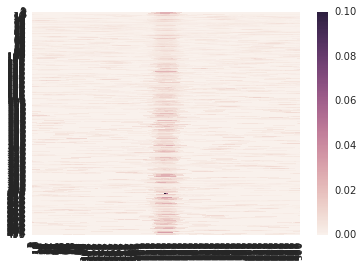

In [27]:
sns.heatmap(item['data'][:500])

#Paper numbers, without the second unssessary merge from total_counts

In [38]:
input_data = {"fox2_iclip": glob.glob("/home/gpratt/projects/fox2_iclip/analysis/v5/assigned/FOX2_lowRNAse_noL.merged.peaks.bed*real.BED"),
 "fox2_293t_1120": glob.glob("/projects/ps-yeolab2/encode/analysis/encode_v12/assigned/293XT_CLIP_RBFOX2_1120_RBFOX2.merged.r2.peaks.bed*real.BED"),
 "fox2_293t_0204": glob.glob("/projects/ps-yeolab2/encode/analysis/encode_v12/assigned/293XT_CLIP_RBFOX2_0204_RBFOX2.merged.r2.peaks.bed*real.BED"),}

In [47]:
result = pd.DataFrame(result)
result.to_csv("/home/gpratt/Dropbox/encode_integration/for_eric/fox2_region_sizes.csv")

In [65]:
input_data = {"RBFOX2_293XT_1to200_gel_RBFOX2": glob.glob("/projects/ps-yeolab2/encode/analysis/encode_v12/assigned/RBFOX2_293XT_1to200_gel_RBFOX2.merged.r2.peaks.bed*real.BED"),
              "RBFOX2_293XT_1to100_gel_RBFOX2": glob.glob("/projects/ps-yeolab2/encode/analysis/encode_v12/assigned/RBFOX2_293XT_1to100_gel_RBFOX2.merged.r2.peaks.bed*real.BED"),
              "RBFOX2_293XT_1to50_gel_RBFOX2": glob.glob("/projects/ps-yeolab2/encode/analysis/encode_v12/assigned/RBFOX2_293XT_1to50_gel_RBFOX2.merged.r2.peaks.bed*real.BED"),
              "RBFOX2_293XT_1to25_gel_RBFOX2": glob.glob("/projects/ps-yeolab2/encode/analysis/encode_v12/assigned/RBFOX2_293XT_1to25_gel_RBFOX2.merged.r2.peaks.bed*real.BED"),
              "RBFOX2_293XT_1to12_gel_RBFOX2": glob.glob("/projects/ps-yeolab2/encode/analysis/encode_v12/assigned/RBFOX2_293XT_1to12_gel_RBFOX2.merged.r2.peaks.bed*real.BED"),
              "EVN_041315_CLIP10_RBFOX2": glob.glob("/projects/ps-yeolab2/encode/analysis/encode_v12/assigned/EVN_041315_CLIP10_RBFOX2.merged.r2.peaks.bed*real.BED"),
              "EVN_041315_CLIP8_RBFOX2": glob.glob("/projects/ps-yeolab2/encode/analysis/encode_v12/assigned/EVN_041315_CLIP8_RBFOX2.merged.r2.peaks.bed*real.BED"),
              "EVN_041315_CLIP1_RBFOX2": glob.glob("/projects/ps-yeolab2/encode/analysis/encode_v12/assigned/EVN_041315_CLIP1_RBFOX2.merged.r2.peaks.bed*real.BED"),
              "EVN_041315_CLIP5_RBFOX2": glob.glob("/projects/ps-yeolab2/encode/analysis/encode_v12/assigned/EVN_041315_CLIP5_RBFOX2.merged.r2.peaks.bed*real.BED"),
              "EVN_041315_CLIP6_RBFOX2": glob.glob("/projects/ps-yeolab2/encode/analysis/encode_v12/assigned/EVN_041315_CLIP6_RBFOX2.merged.r2.peaks.bed*real.BED"),
             }

In [67]:
result = defaultdict(dict)
for name, bedtool_names in input_data.items():
    bedtools = {os.path.basename(item): pybedtools.BedTool(item) for item in  bedtool_names}
    
    for region, bedtool in bedtools.items():
        result[name][region.split(".")[-3]] = sum(len(interval) for interval in bedtool)
result = pd.DataFrame(result)
result.to_csv("/home/gpratt/Dropbox/encode_integration/for_eric/shearing_fox2_region_sizes.csv")

In [68]:
result

,EVN_041315_CLIP10_RBFOX2,EVN_041315_CLIP1_RBFOX2,EVN_041315_CLIP5_RBFOX2,EVN_041315_CLIP6_RBFOX2,EVN_041315_CLIP8_RBFOX2,RBFOX2_293XT_1to100_gel_RBFOX2,RBFOX2_293XT_1to12_gel_RBFOX2,RBFOX2_293XT_1to200_gel_RBFOX2,RBFOX2_293XT_1to25_gel_RBFOX2,RBFOX2_293XT_1to50_gel_RBFOX2
all,1315686,891373,709172,33067,712239,1365470,1420783,844461,1078740,1203667
cds,328547,86454,25790,2360,178127,265498,161481,199809,184124,199512
distintron500,344905,355516,370102,15707,185330,395350,483823,215733,328433,365555
five_prime_utrs,105007,51760,22580,635,56423,119360,107822,81839,85725,100122
proxintron500,376555,315927,244871,12439,194319,416764,522587,235813,345653,401003
three_prime_utrs,160672,81716,45829,1926,98040,168498,145070,111267,134805,137475
uncatagorized,25400,12884,7535,2140,14827,21593,18289,14467,15906,19212


In [7]:
input_data = {"EV42": glob.glob("/home/gpratt/projects/encode/analysis/ad-hoc/assigned/EV42_01.basedon_EV42_01.peaks.l2inputnormnew.bed.compressed.bed.l10p_5_l2fc_3.bed*real.BED"),
 "EV43": glob.glob("/home/gpratt/projects/encode/analysis/ad-hoc/assigned/EV43_01.basedon_EV43_01.peaks.l2inputnormnew.bed.compressed.bed.l10p_5_l2fc_3.bed*real.BED"),
}

In [8]:
result = defaultdict(dict)
for name, bedtool_names in input_data.items():
    bedtools = {os.path.basename(item): pybedtools.BedTool(item) for item in  bedtool_names}
    
    for region, bedtool in bedtools.items():
        result[name][region.split(".")[-3]] = sum(len(interval) for interval in bedtool)
result = pd.DataFrame(result)
result.to_csv("/home/gpratt/Dropbox/encode_integration/for_eric/EV_42_and_43_pie_charts.csv")

In [9]:
result

,EV42,EV43
all,346876,400417
cds,22858,36540
distintron500,159474,157397
five_prime_utrs,7212,12964
proxintron500,132795,162586
three_prime_utrs,24537,30930
uncatagorized,1805,1745


In [3]:
input_data = {"492_01_DDX3X": glob.glob("/projects/ps-yeolab2/encode/analysis/encode_v12/assigned/492_01_DDX3X.merged.r2.peaks.bed*real.BED"),
              "492_02_DDX3X": glob.glob("/projects/ps-yeolab2/encode/analysis/encode_v12/assigned/492_02_DDX3X.merged.r2.peaks.bed*real.BED"),
              "477_01_NCBP2": glob.glob("/projects/ps-yeolab2/encode/analysis/encode_v12/assigned/477_01_NCBP2.merged.r2.peaks.bed*real.BED"),
              "477_02_NCBP2": glob.glob("/projects/ps-yeolab2/encode/analysis/encode_v12/assigned/477_02_NCBP2.merged.r2.peaks.bed*real.BED"),
              "297_01_FAM120A": glob.glob("/projects/ps-yeolab2/encode/analysis/encode_v12/assigned/297_01_FAM120A.merged.r2.peaks.bed*real.BED"),
              "297_01_FAM120A": glob.glob("/projects/ps-yeolab2/encode/analysis/encode_v12/assigned/297_02_FAM120A.merged.r2.peaks.bed*real.BED"),
             }

In [4]:
result = defaultdict(dict)
for name, bedtool_names in input_data.items():
    bedtools = {os.path.basename(item): pybedtools.BedTool(item) for item in  bedtool_names}
    
    for region, bedtool in bedtools.items():
        result[name][region.split(".")[-3]] = sum(len(interval) for interval in bedtool)
result = pd.DataFrame(result)
result.to_csv("/home/gpratt/Dropbox/NatMethodsPaper/rbp_localization.csv")